In [1]:
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import math
from collections import Counter
import json

#### We first count all the words present in the text file using a counter

In [2]:
words = Counter()

with open('./text.txt', 'r') as text:
    content = text.read().split(' ')
    for word in content:
        word = re.sub(r'[^\w+]', '', word).lower()
        if word in words.keys():
            words[word] += 1
        else:
            words[word] = 1

In [3]:
# Dump them for use later
with open('./results.json', 'w') as data:
    data.write(json.dumps(words.most_common(), indent=4))

Here we extract the words and frequencies seperately from the counter object

In [4]:
# Extract sorted words and frequencies from counter object
sorted_words = [word[0] for word in words.most_common()]
sorted_freq = [word[1] for word in words.most_common()]
ranks = list(range(1, len(sorted_words)+1))

#### Here we estimate the slope of the log-log relation using a log MLE

In [6]:
def loglik(b):  
    # Power law function
    rank_vector = np.array(ranks)**(-b)

    # Normalized
    norm_rank_vector = rank_vector/rank_vector.sum()
    freq_rank_vector = np.log(norm_rank_vector) * np.array(sorted_freq)

    sum = freq_rank_vector.sum()
    return -sum


s_best = minimize(loglik, np.array([2]))

print(f"Best slope is: {s_best.x[0]}")

Best slope is: 0.9690786609757311


####  Create a log-log plot with the fitted curve and the frequency data

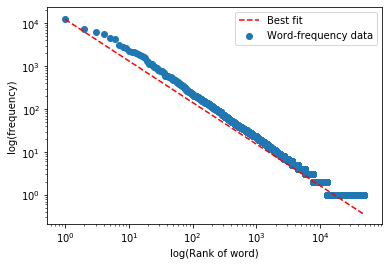

In [7]:
# Create the plot
fig = plt.figure()
plt.xlabel('log(Rank of word)')
plt.ylabel('log(frequency)')

plt.xscale('log')
plt.yscale('log')

x = np.linspace(1, len(sorted_freq), 1000)
y = sorted_freq[0] * np.power(x, -s_best.x)

plt.plot(x, y, '--r', label='Best fit')
plt.scatter(ranks, sorted_freq, label='Word-frequency data')
plt.legend()

plt.show()

In [8]:
def zipf_freq(rank, slope, most_freq_word):
    return math.floor(most_freq_word * math.pow(rank, slope))


rank = int(input("Input a rank: "))
print(f"You chose the word {sorted_words[rank-1]} with frequency {sorted_freq[rank-1]}")
print(f"Calculated frequency is: {zipf_freq(rank, -s_best.x, sorted_freq[0])}")

Input a rank: 400
You chose the word forward with frequency 53
Calculated frequency is: 37
